# Datetime

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#In-datetime" data-toc-modified-id="In-datetime-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>In datetime</a></span></li><li><span><a href="#In-pandas" data-toc-modified-id="In-pandas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>In pandas</a></span><ul class="toc-item"><li><span><a href="#resample" data-toc-modified-id="resample-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>resample</a></span></li><li><span><a href="#timezone-in-pandas" data-toc-modified-id="timezone-in-pandas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>timezone in pandas</a></span></li></ul></li></ul></div>

In [2]:
from datetime import datetime

## In datetime

In [3]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 12, 31, 15, 19, 13)

# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-12-31 15:19:13


In [6]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
onebike_datetimes = [{'end': datetime(2017, 10, 1, 15, 26, 26),
  'start': datetime(2017, 10, 1, 15, 23, 25)},
 {'end': datetime(2017, 10, 1, 17, 49, 59),
  'start': datetime(2017, 10, 1, 15, 42, 57)},
 {'end': datetime(2017, 10, 2, 6, 42, 53),
  'start': datetime(2017, 10, 2, 6, 37, 10)}]
# Loop over all trips
for trip in onebike_datetimes:
# Check to see if the trip starts before noon
    if trip['start'].hour < 12:
    # Increment the counter for before noon
        trip_counts['AM'] += 1
    else:
    # Increment the counter for after noon
        trip_counts['PM'] += 1

print(trip_counts)

{'AM': 1, 'PM': 2}


In [7]:
# Import the datetime class
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

1986-12-15 08:00:00


In [9]:
# Import datetime, timedelta, timezone
from datetime import datetime, timedelta, timezone

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=+11))
utc = timezone.utc
# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)
dt2 = datetime(2017, 10, 1, 15, 26, 26, tzinfo=utc)
# Print results
print(dt.isoformat())
print(dt2.isoformat())

2017-10-01T15:26:26+11:00
2017-10-01T15:26:26+00:00


In [10]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:3]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

In [12]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start and set it to UTC
  dt = trip['start'].astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00


In [14]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [15]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [16]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [17]:
# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end 
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

In [ ]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

## In pandas

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

In [47]:
rides = pd.read_csv('capital-onebike.csv', parse_dates=['Start date', 'End date'])
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

### resample

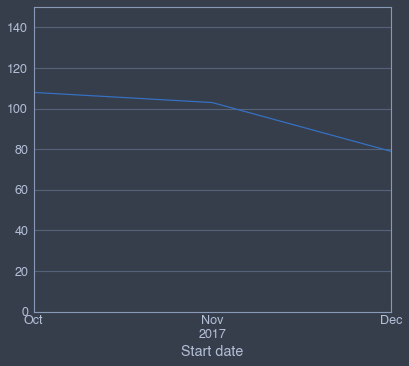

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64
Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


In [48]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])
# Show the results
plt.show()

monthly_rides = rides.resample('M', on='Start date')['Member type']
print(monthly_rides.value_counts() / monthly_rides.size())

# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on= 'Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

### timezone in pandas

In [49]:
# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')


# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')
rides['End date'] = rides['End date'].dt.tz_convert('Europe/London')
# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00


In [50]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.weekday_name

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


In [51]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64
